In [1]:
from load import load_and_prepare_data
from load import load_and_prepare_noisy_data
from load import load_and_prepare_data_one_pixel

import numpy as np

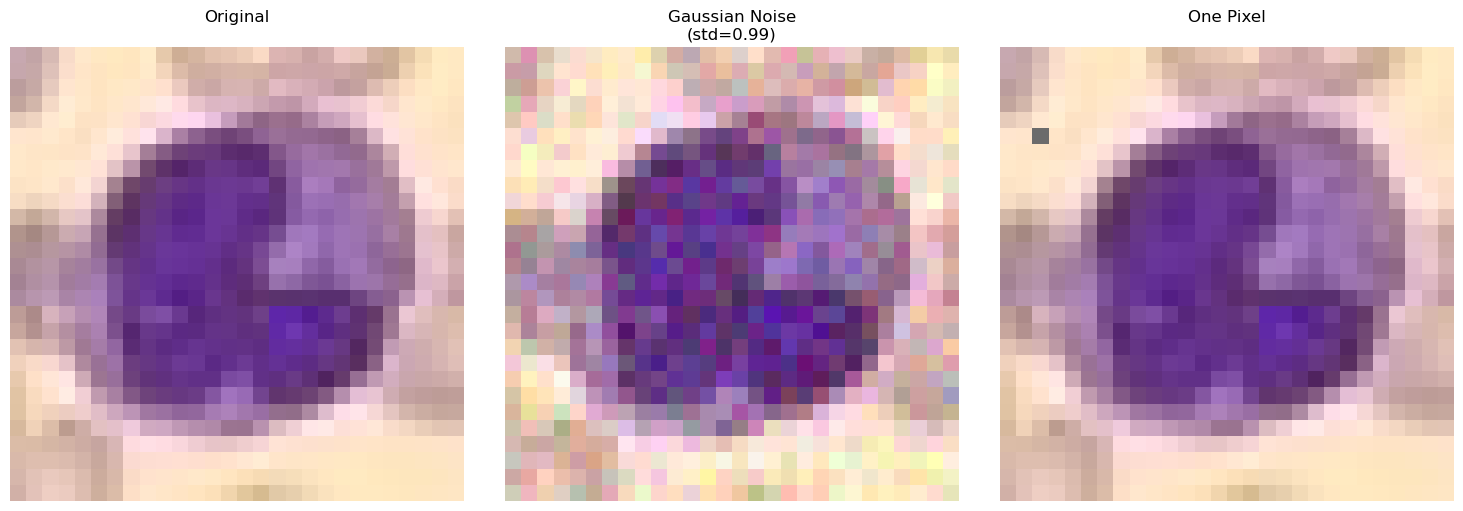

Image 1 matches first image: False
Image 2 matches first image: False


In [2]:
import matplotlib.pyplot as plt

def compare_multiple_dataloader_images(loaders_dict, index=0, figsize=(15, 5)):
    """
    Compare images from multiple dataloaders side by side.
    
    Args:
        loaders_dict: Dictionary of {loader_name: (dataloader, noise_std)}
        index: Index of the image to display
        figsize: Size of the figure (width, height)
    """
    num_loaders = len(loaders_dict)
    
    # Calculate number of rows and columns for subplot grid
    ncols = min(4, num_loaders)  # Max 4 images per row
    nrows = (num_loaders + ncols - 1) // ncols
    
    # Create figure with subplots
    fig, axes = plt.subplots(nrows, ncols, figsize=(figsize[0], figsize[1] * nrows))
    if nrows == 1 and ncols == 1:
        axes = np.array([axes])
    axes = axes.flatten()
    
    # Store all images for comparison
    images = []
    
    # Plot each image
    for idx, (loader_name, (loader, noise_std)) in enumerate(loaders_dict.items()):
        # Get image from dataset
        image = loader.dataset[index][0]
        
        # Convert from tensor and denormalize
        image = image.permute(1, 2, 0).numpy()
        image = (image * 0.5 + 0.5).clip(0, 1)
        images.append(image)
        
        # Plot image
        axes[idx].imshow(image.squeeze(), cmap='gray')
        title = f'{loader_name}\n'
        if noise_std is not None:
            title += f'(std={noise_std})'
        axes[idx].set_title(title)
        axes[idx].axis('off')
    
    # Hide empty subplots
    for idx in range(len(loaders_dict), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Compare all images with the first image
    first_image = images[0]
    for idx, image in enumerate(images[1:], 1):
        print(f"Image {idx} matches first image: {np.allclose(first_image, image, atol=1e-5)}")

# Create dictionary of loaders
loaders_dict = {
    'Original': (load_and_prepare_data()[0]['Full'], None),
    'Gaussian Noise': (load_and_prepare_noisy_data('gaussian')[0]['Full'], 0.99),
    'One Pixel': (load_and_prepare_data_one_pixel()[0]['Full'], None)
}

# Try running:
compare_multiple_dataloader_images(loaders_dict, index=22)